In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
import glob
import pandas as pd 
import numpy as np

import matplotlib.pylab as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from tensorflow.keras.layers.experimental.preprocessing import Normalization

import tensorflow as tf

from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.layers.experimental import preprocessing

print(tf.__version__)

2.4.1


In [3]:
col_names=['TimeStamp since route start (seconds)'
,'GPS Latitude (degrees)'
,'GPS Longitude (degrees)'
,'Score total WINDOW (base 100, direct mean of the other 7 scores)'
,'Score accelerations WINDOW (base 100)'
,'Score brakings WINDOW (base 100)'
,'Score turnings WINDOW (base 100)'
,'Score weaving WINDOW (base 100)'
,'Score drifting WINDOW (base 100)'
,'Score overspeeding WINDOW (base 100)'
,'Score car-following WINDOW (base 100)'
,'Ratio normal WINDOW (base 1)'
,'Ratio drowsy WINDOW (base 1)'
,'Ratio aggressive WINDOW (base 1)'
,'Ratio distracted WINDOW (1=distraction detected in last 2 seconds, 0=otherwise)'
,'Score total (base 100, direct mean of the other 7 scores)'
,'Score accelerations (base 100)'
,'Score brakings (base 100)'
,'Score turnings (base 100)'
,'Score weaving (base 100)'
,'Score drifting (base 100)'
,'Score overspeeding (base 100)'
,'Score car-following (base 100)'
,'Ratio normal (base 1)'
,'Ratio drowsy (base 1)'
,'Ratio aggressive (base 1)'
,'Ratio distracted (1=distraction detected in last 2 seconds, 0=otherwise)']

SEMANTIC_ONLINE = []
for infile in glob.glob("/content/drive/MyDrive/ENEL645/Project/UAH_DS/*.txt"):
  data = pd.read_csv(infile,names=col_names,sep=' ',header=None, index_col = False,na_values='NaN')
  SEMANTIC_ONLINE.append(data)

SEMANTIC_ONLINE = pd.concat(SEMANTIC_ONLINE)
# SEMANTIC_ONLINE.fillna(0, inplace=True)
SEMANTIC_ONLINE = SEMANTIC_ONLINE.dropna(how='any',axis=0)
SEMANTIC_ONLINE.head()

,TimeStamp since route start (seconds),GPS Latitude (degrees),GPS Longitude (degrees),"Score total WINDOW (base 100, direct mean of the other 7 scores)",Score accelerations WINDOW (base 100),Score brakings WINDOW (base 100),Score turnings WINDOW (base 100),Score weaving WINDOW (base 100),Score drifting WINDOW (base 100),Score overspeeding WINDOW (base 100),Score car-following WINDOW (base 100),Ratio normal WINDOW (base 1),Ratio drowsy WINDOW (base 1),Ratio aggressive WINDOW (base 1),"Ratio distracted WINDOW (1=distraction detected in last 2 seconds, 0=otherwise)","Score total (base 100, direct mean of the other 7 scores)",Score accelerations (base 100),Score brakings (base 100),Score turnings (base 100),Score weaving (base 100),Score drifting (base 100),Score overspeeding (base 100),Score car-following (base 100),Ratio normal (base 1),Ratio drowsy (base 1),Ratio aggressive (base 1),"Ratio distracted (1=distraction detected in last 2 seconds, 0=otherwise)"
0,7.8,40.512787,-3.404477,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,1.0,0.0,0.0,0.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,1.0,0.0,0.0,0.0
1,8.8,40.512924,-3.404577,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,1.0,0.0,0.0,0.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,1.0,0.0,0.0,0.0
2,9.8,40.513065,-3.404680,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,1.0,0.0,0.0,0.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,1.0,0.0,0.0,0.0
3,10.8,40.513210,-3.404772,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,1.0,0.0,0.0,0.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,1.0,0.0,0.0,0.0
4,11.8,40.513348,-3.404868,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,1.0,0.0,0.0,0.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,1.0,0.0,0.0,0.0


In [4]:
SEMANTIC_ONLINE.describe()

,TimeStamp since route start (seconds),GPS Latitude (degrees),GPS Longitude (degrees),"Score total WINDOW (base 100, direct mean of the other 7 scores)",Score accelerations WINDOW (base 100),Score brakings WINDOW (base 100),Score turnings WINDOW (base 100),Score weaving WINDOW (base 100),Score drifting WINDOW (base 100),Score overspeeding WINDOW (base 100),Score car-following WINDOW (base 100),Ratio normal WINDOW (base 1),Ratio drowsy WINDOW (base 1),Ratio aggressive WINDOW (base 1),"Ratio distracted WINDOW (1=distraction detected in last 2 seconds, 0=otherwise)","Score total (base 100, direct mean of the other 7 scores)",Score accelerations (base 100),Score brakings (base 100),Score turnings (base 100),Score weaving (base 100),Score drifting (base 100),Score overspeeding (base 100),Score car-following (base 100),Ratio normal (base 1),Ratio drowsy (base 1),Ratio aggressive (base 1),"Ratio distracted (1=distraction detected in last 2 seconds, 0=otherwise)"
count,4796.000000,4796.000000,4796.000000,4796.000000,4796.0,4796.000000,4796.000000,4796.000000,4796.000000,4796.000000,4796.000000,4796.000000,4796.000000,4796.000000,4796.000000,4796.000000,4796.0,4796.000000,4796.000000,4796.000000,4796.000000,4796.000000,4796.000000,4796.000000,4796.000000,4796.000000,4796.000000
mean,374.208549,40.513124,-3.451394,83.356464,100.0,80.249083,79.783611,84.143015,64.113887,76.685259,98.522686,0.489499,0.254663,0.258743,0.008966,86.560634,100.0,84.259758,83.878044,92.020997,72.887281,76.293536,96.581214,0.627224,0.182973,0.189807,0.008966
std,226.584549,0.039421,0.050838,10.464995,0.0,30.006308,19.075908,33.266231,18.258431,28.905737,1.700543,0.242292,0.199805,0.188995,0.094272,10.696138,0.0,33.258803,31.796999,26.936739,19.746853,30.564655,11.278521,0.229949,0.182570,0.182309,0.094272
min,7.700000,40.463497,-3.557142,58.000000,100.0,0.000000,0.000000,0.000000,24.400000,0.000000,88.900000,0.000000,0.000000,0.000000,0.000000,50.400000,100.0,0.000000,0.000000,0.000000,15.900000,0.000000,14.800000,0.000000,0.000000,0.000000,0.000000
25%,185.775000,40.471763,-3.484474,77.300000,100.0,72.275000,70.300000,100.000000,50.000000,68.300000,97.800000,0.302000,0.122000,0.137000,0.000000,81.275000,100.0,100.000000,100.000000,100.000000,60.100000,64.900000,99.800000,0.504000,0.057000,0.052000,0.000000
50%,356.850000,40.505217,-3.452282,87.200000,100.0,97.200000,82.400000,100.000000,63.000000,87.600000,98.900000,0.549000,0.161000,0.198000,0.000000,88.500000,100.0,100.000000,100.000000,100.000000,77.100000,90.200000,100.000000,0.674000,0.116000,0.133000,0.000000
75%,532.350000,40.551336,-3.411291,91.100000,100.0,100.000000,100.000000,100.000000,78.700000,96.500000,100.000000,0.670000,0.388000,0.304000,0.000000,95.000000,100.0,100.000000,100.000000,100.000000,89.700000,99.800000,100.000000,0.799000,0.233000,0.261000,0.000000
max,948.800000,40.584736,-3.354153,100.000000,100.0,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,1.000000,0.707000,0.750000,1.000000,100.000000,100.0,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,1.000000,0.740000,0.840000,1.000000


In [5]:
data = SEMANTIC_ONLINE[['TimeStamp since route start (seconds)'
                            ,'GPS Latitude (degrees)'
                            ,'GPS Longitude (degrees)','Ratio normal (base 1)'
                            ,'Ratio drowsy (base 1)'
                            ,'Ratio aggressive (base 1)'
,'Ratio distracted (1=distraction detected in last 2 seconds, 0=otherwise)']]
data.columns=['time_stamp', 'latitude', 'longitude','normal','drowsy','aggressive','distracted']
data.head()

,time_stamp,latitude,longitude,normal,drowsy,aggressive,distracted
0,7.8,40.512787,-3.404477,1.0,0.0,0.0,0.0
1,8.8,40.512924,-3.404577,1.0,0.0,0.0,0.0
2,9.8,40.513065,-3.404680,1.0,0.0,0.0,0.0
3,10.8,40.513210,-3.404772,1.0,0.0,0.0,0.0
4,11.8,40.513348,-3.404868,1.0,0.0,0.0,0.0


In [6]:
data.describe()

,time_stamp,latitude,longitude,normal,drowsy,aggressive,distracted
count,4796.000000,4796.000000,4796.000000,4796.000000,4796.000000,4796.000000,4796.000000
mean,374.208549,40.513124,-3.451394,0.627224,0.182973,0.189807,0.008966
std,226.584549,0.039421,0.050838,0.229949,0.182570,0.182309,0.094272
min,7.700000,40.463497,-3.557142,0.000000,0.000000,0.000000,0.000000
25%,185.775000,40.471763,-3.484474,0.504000,0.057000,0.052000,0.000000
50%,356.850000,40.505217,-3.452282,0.674000,0.116000,0.133000,0.000000
75%,532.350000,40.551336,-3.411291,0.799000,0.233000,0.261000,0.000000
max,948.800000,40.584736,-3.354153,1.000000,0.740000,0.840000,1.000000


In [7]:
print("Number of normal:",np.unique(data['normal']).size)
print("normal:",np.unique(data['normal'])[0:10])
print("Number of drowsy:",np.unique(data['drowsy']).size)
print("drowsy:",np.unique(data['drowsy'])[0:10])
print("Number of aggressive:",np.unique(data['aggressive']).size)
print("aggressive:",np.unique(data['aggressive'])[0:10])
print("Number of distracted:",np.unique(data['distracted']).size)
print("distracted:",np.unique(data['distracted'])[0:10])

Number of normal: 851
normal: [0.    0.002 0.003 0.004 0.005 0.006 0.007 0.009 0.012 0.013]
Number of drowsy: 549
drowsy: [0.    0.002 0.003 0.004 0.005 0.006 0.007 0.008 0.009 0.01 ]
Number of aggressive: 559
aggressive: [0.    0.001 0.002 0.003 0.004 0.005 0.006 0.007 0.008 0.009]
Number of distracted: 2
distracted: [0. 1.]


In [8]:
X = data[['time_stamp','latitude','longitude']]
y = data[['normal']]
print('X shape = ', X.shape)
print('Y shape = ', y.shape)

X shape =  (4796, 3)
Y shape =  (4796, 1)


In [9]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=None, shuffle=False,)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.25, random_state=None, shuffle=False) # 0.25 x 0.8 = 0.2
print('X_train = ', X_train.shape)
print('y_train = ', y_train.shape)
print('X_test = ', X_test.shape)
print('y_test = ', y_test.shape)
print('X_val = ', X_val.shape)
print('y_val = ', y_val.shape)

X_train =  (2877, 3)
y_train =  (2877, 1)
X_test =  (960, 3)
y_test =  (960, 1)
X_val =  (959, 3)
y_val =  (959, 1)


In [10]:
normalizer = Normalization()
normalizer.adapt(np.array(X_train))
print(normalizer.mean.numpy())
first = np.array(X_train[:1])
with np.printoptions(precision=2, suppress=True):
  print('First example:', first)
  print()
  print('Normalized:', normalizer(first).numpy())

[372.87338    40.509937   -3.4464812]
First example: [[ 7.8  40.51 -3.4 ]]

Normalized: [[-1.67  0.07  0.83]]


In [11]:
def build_and_compile_model(norm):
  model = keras.Sequential([
      norm,
      layers.Dense(128, activation='sigmoid'),
      layers.Dense(256, activation='sigmoid'),
      layers.Dense(128, activation='sigmoid'),
      layers.Dense(1, activation='sigmoid')
  ])

  model.compile(loss='mse',
                optimizer='adam')
  return model

dnn_model = build_and_compile_model(normalizer)
dnn_model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
normalization (Normalization (None, 3)                 7         
_________________________________________________________________
dense (Dense)                (None, 128)               512       
_________________________________________________________________
dense_1 (Dense)              (None, 256)               33024     
_________________________________________________________________
dense_2 (Dense)              (None, 128)               32896     
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 129       
Total params: 66,568
Trainable params: 66,561
Non-trainable params: 7
_________________________________________________________________


In [12]:
es_function = tf.keras.callbacks.EarlyStopping(
    monitor='val_loss', min_delta=0, patience=100, verbose=0,
    mode='auto', baseline=None, restore_best_weights=True
)

In [13]:
%%time
history = dnn_model.fit(X_train, y_train,batch_size=64,validation_data=(X_val,y_val),verbose=1, epochs=200,callbacks=[es_function])

Epoch 1/200
45/45 [==============================] - 1s 11ms/step - loss: 0.0235 - val_loss: 0.1006
Epoch 2/200
45/45 [==============================] - 0s 3ms/step - loss: 0.0239 - val_loss: 0.1334
Epoch 3/200
45/45 [==============================] - 0s 3ms/step - loss: 0.0217 - val_loss: 0.1175
Epoch 4/200
45/45 [==============================] - 0s 3ms/step - loss: 0.0214 - val_loss: 0.1024
Epoch 5/200
45/45 [==============================] - 0s 3ms/step - loss: 0.0197 - val_loss: 0.1211
Epoch 6/200
45/45 [==============================] - 0s 3ms/step - loss: 0.0207 - val_loss: 0.1093
Epoch 7/200
45/45 [==============================] - 0s 3ms/step - loss: 0.0199 - val_loss: 0.1020
Epoch 8/200
45/45 [==============================] - 0s 3ms/step - loss: 0.0200 - val_loss: 0.1172
Epoch 9/200
45/45 [==============================] - 0s 3ms/step - loss: 0.0197 - val_loss: 0.1069
Epoch 10/200
45/45 [==============================] - 0s 3ms/step - loss: 0.0212 - val_loss: 0.1091
Epoch 11

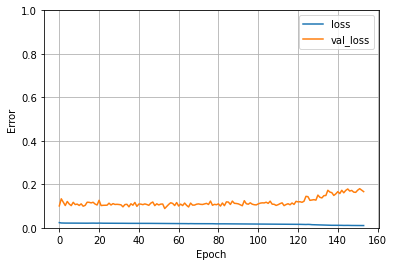

In [14]:
def plot_loss(history):
  plt.plot(history.history['loss'], label='loss')
  plt.plot(history.history['val_loss'], label='val_loss')
  plt.ylim([0, 1])
  plt.xlabel('Epoch')
  plt.ylabel('Error')
  plt.legend()
  plt.grid(True)

plot_loss(history)

In [15]:
test_results = dnn_model.evaluate(X_test, y_test, verbose=0)
print(test_results)

0.14876240491867065


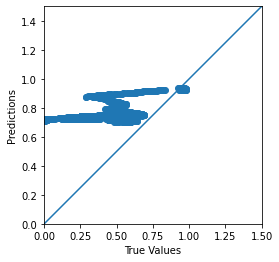

In [16]:
test_predictions = dnn_model.predict(X_test).flatten()

a = plt.axes(aspect='equal')
plt.scatter(y_test, test_predictions)
plt.xlabel('True Values')
plt.ylabel('Predictions')
lims = [0, 1.5]
plt.xlim(lims)
plt.ylim(lims)
_ = plt.plot(lims, lims)

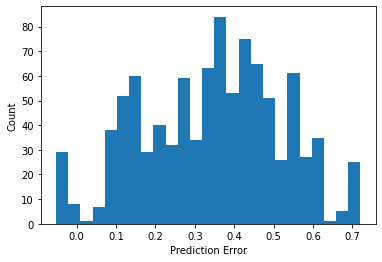

In [17]:
error = test_predictions - np.array(y_test).flatten()
plt.hist(error, bins=25)
plt.xlabel('Prediction Error')
_ = plt.ylabel('Count')